# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# WEATHER_API URL: http://api.openweathermap.org/data/2.5/weather?appid=fc77fb30aacf15de2e57f6ad2f7b9786&units=metric&q=
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


#Lists for holding weather data
temp = []
humidity = []
max_temp = []
cloudiness = []
windspeed = []
country = []
date = []
city2 = []

#Lat (y) | Long (x) 
lat = []
lng = []

#for loop numbers for Record number and Set numbers
number = 1 
set_num = 1

#Loop through 500 cities for weather data
for city in cities[:500]:
    weather_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    weather_response = requests.get(weather_url)
    weather_json = weather_response.json()

    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        city2.append(city)

            

        print(f"Processing Record {number} of Set of {set_num} | {city}")
        number = number + 1
        if number > 50:
            number = 0 
            set_num = set_num + 1 
            
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set of 1 | buchanan
Processing Record 2 of Set of 1 | whithorn
Processing Record 3 of Set of 1 | avarua
Processing Record 4 of Set of 1 | mataura
Processing Record 5 of Set of 1 | bowen
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set of 1 | upernavik
Processing Record 7 of Set of 1 | dalianwan
Processing Record 8 of Set of 1 | hilo
Processing Record 9 of Set of 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 10 of Set of 1 | kapaa
Processing Record 11 of Set of 1 | vaini
Processing Record 12 of Set of 1 | touros
Processing Record 13 of Set of 1 | qaanaaq
City not found. Skipping...
Processing Record 14 of Set of 1 | ushuaia
Processing Record 15 of Set of 1 | jamestown
Processing Record 16 of Set of 1 | port alfred
Processing Record 17 of Set of 1 | vestmannaeyjar
Processing Record 18 of Set of 1 | trapani
Processing Record 19 of Set of 1 | hofn
Processing Record 20 of Set of 1 | hobart
Processing Record 21 of Set o

Processing Record 22 of Set of 4 | nishihara
City not found. Skipping...
Processing Record 23 of Set of 4 | palana
Processing Record 24 of Set of 4 | geraldton
Processing Record 25 of Set of 4 | half moon bay
Processing Record 26 of Set of 4 | abonnema
Processing Record 27 of Set of 4 | muros
Processing Record 28 of Set of 4 | taoudenni
Processing Record 29 of Set of 4 | sechura
Processing Record 30 of Set of 4 | acarau
Processing Record 31 of Set of 4 | dzhebariki-khaya
Processing Record 32 of Set of 4 | lakshettipet
Processing Record 33 of Set of 4 | medina del campo
Processing Record 34 of Set of 4 | northam
Processing Record 35 of Set of 4 | komsomolskiy
Processing Record 36 of Set of 4 | japura
Processing Record 37 of Set of 4 | monrovia
Processing Record 38 of Set of 4 | mongomo
Processing Record 39 of Set of 4 | sao joao da barra
Processing Record 40 of Set of 4 | constitucion
City not found. Skipping...
Processing Record 41 of Set of 4 | sharan
Processing Record 42 of Set of 4 

Processing Record 45 of Set of 7 | sao gabriel da cachoeira
Processing Record 46 of Set of 7 | kolondieba
Processing Record 47 of Set of 7 | jutai
Processing Record 48 of Set of 7 | baikunthpur
Processing Record 49 of Set of 7 | matagami
Processing Record 50 of Set of 7 | vao
Processing Record 0 of Set of 8 | elko
Processing Record 1 of Set of 8 | mahajanga
Processing Record 2 of Set of 8 | provideniya
Processing Record 3 of Set of 8 | tucupita
City not found. Skipping...
Processing Record 4 of Set of 8 | jatai
Processing Record 5 of Set of 8 | angoram
Processing Record 6 of Set of 8 | richards bay
Processing Record 7 of Set of 8 | kitui
Processing Record 8 of Set of 8 | jacqueville
Processing Record 9 of Set of 8 | vanimo
Processing Record 10 of Set of 8 | caldwell
Processing Record 11 of Set of 8 | iqaluit
Processing Record 12 of Set of 8 | torbat-e jam
Processing Record 13 of Set of 8 | ambon
Processing Record 14 of Set of 8 | pietarsaari
Processing Record 15 of Set of 8 | mocuba
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create dataframe
weather_dict = {"City": city2,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Windspeed": windspeed,
                "Country": country,
                "Date": date,
                }
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,buchanan,5.8808,-10.0467,23.98,86,100,2.46,LR,1628556223
1,whithorn,18.2604,-78.0378,27.59,89,9,0.97,JM,1628556223
2,avarua,-21.2078,-159.7750,26.03,78,20,4.63,CK,1628556018
3,mataura,-46.1927,168.8643,9.71,95,100,3.14,NZ,1628556019
4,bowen,-20.0167,148.2333,24.12,58,0,7.09,AU,1628556224
...,...,...,...,...,...,...,...,...,...
451,yulara,-25.2406,130.9889,14.91,25,0,1.54,AU,1628556074
452,karangasem,-8.4500,115.6167,26.49,73,44,3.20,ID,1628556352
453,saint-joseph,-21.3667,55.6167,19.20,83,21,1.83,RE,1628556084
454,bathsheba,13.2167,-59.5167,25.34,88,20,2.57,BB,1628556062


In [11]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02
mean,21.994845,13.850407,20.822018,73.598684,49.752193,3.623268,1.628556e+09
std,32.818135,90.872723,7.212533,19.438127,41.039809,2.727733,1.438911e+02
min,-54.800000,-175.200000,2.130000,11.000000,0.000000,0.000000,1.628556e+09
25%,-3.437900,-68.353625,15.572500,65.000000,6.000000,1.540000,1.628556e+09
50%,23.076800,15.889550,21.860000,78.000000,42.000000,2.975000,1.628556e+09
75%,49.758475,95.518550,26.042500,88.000000,97.000000,4.762500,1.628556e+09
max,78.218600,179.316700,42.150000,100.000000,100.000000,15.910000,1.628556e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
## Did not need to do. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

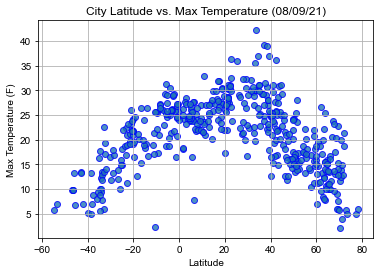

In [14]:
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Max Temperature (F).png")

## Latitude vs. Humidity Plot

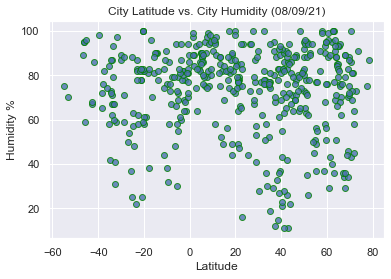

In [15]:
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="green", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

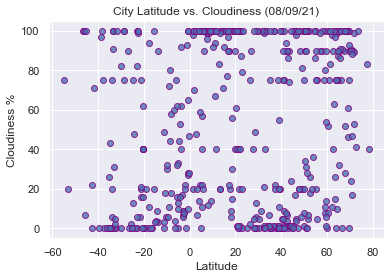

In [16]:
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="purple", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

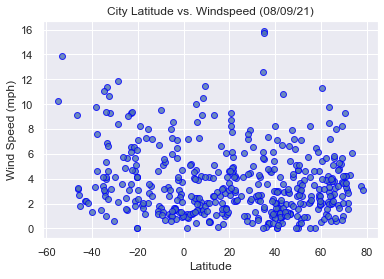

In [17]:
plt.scatter(weather_data["Lat"], 
            weather_data["Windspeed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [18]:
#Cities on the Equator will be included in the Southern Hemisphere data. 
northern_lat = weather_data[weather_data['Lat'] > 0]
southern_lat = weather_data[weather_data['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

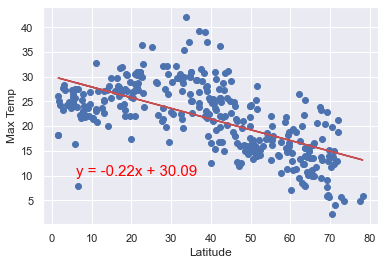

R-squared: 0.391762


In [19]:
x_values = northern_lat['Lat']
y_values = northern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

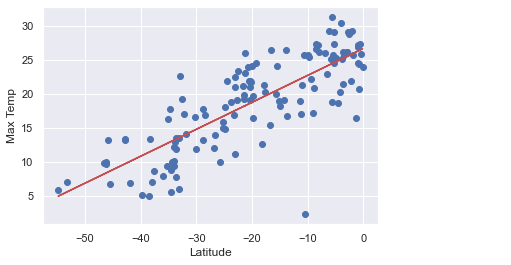

R-squared: 0.640509


In [20]:
x_values = southern_lat['Lat']
y_values = southern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

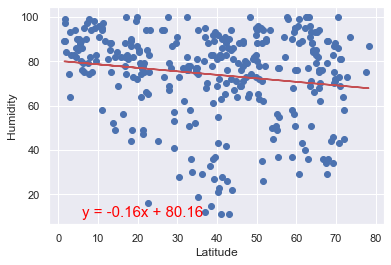

R-squared: 0.026292


In [21]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

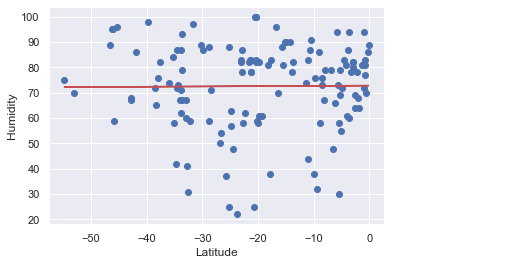

R-squared: 0.000078


In [22]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

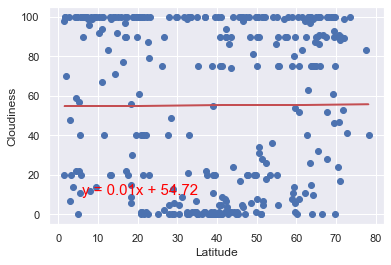

R-squared: 0.000037


In [23]:
x_values = northern_lat['Lat']
y_values = northern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

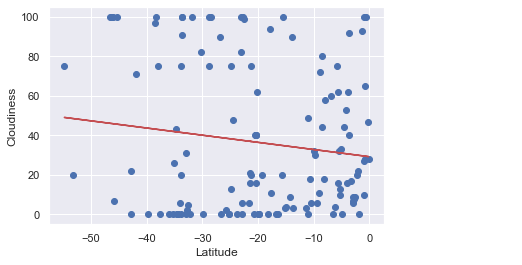

R-squared: 0.018815


In [24]:
x_values = southern_lat['Lat']
y_values = southern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

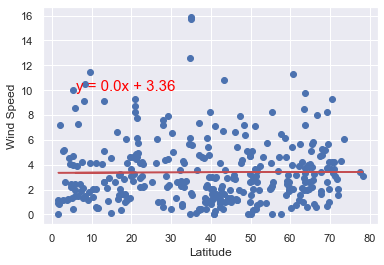

R-squared: 0.000041


In [25]:
x_values = northern_lat['Lat']
y_values = northern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

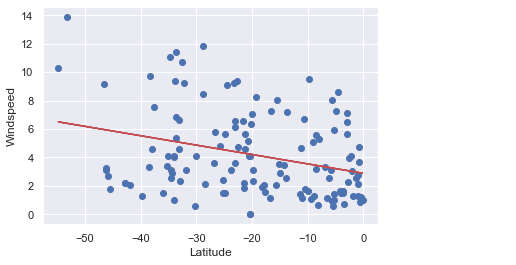

R-squared: 0.095104


In [26]:
x_values = southern_lat['Lat']
y_values = southern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")